# R8

In [ ]:
# Proteomics and joint embedding

In [2]:
production_date = '2024-03-20' 

In [3]:
%whos

Variable          Type    Data/Info
-----------------------------------
production_date   str     2024-03-20


In [4]:
# Data handling & comparision setup
import pandas as pd
import glob
import itertools

# Feature selection, RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# Import 3 SciKit Learn classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Classification setup and eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import statistics

# Plotting
import matplotlib.pyplot as plt

### Set data paths

#### Input read

In [7]:
# phase = 'Input', need for all comparisons
inp_pths = sorted(
    glob.glob('../data/r8/nc*.tsv'), reverse = True)
inp_pths

['../data/r8/nc4_tran-prot_cell-line+CPTAC.tsv',
 '../data/r8/nc4_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3d_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3c_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3b_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3a_proteomics_cell-line+CPTAC.tsv']

##### Check label capitalization on input paths

In [ ]:
for inp_pth in inp_pths:
    df = pd.read_csv(
        inp_pth, sep = '\t', index_col = 0)
    print(df.System.unique())

In [ ]:
# Conclusion - MBatch rebuild script converted to caps
    # archive caps versions
    # conver to lowercase and re-write

#### MBatch

In [ ]:
# phase = 'MBatch'
mb_pths = sorted(
    glob.glob('../results/r72/mbatch/*.tsv'), reverse = True)
mb_pths

##### MBatch i-o de-capitilize

In [ ]:
for mb_pth in mb_pths:
    df = pd.read_csv(
        mb_pth, sep = '\t', index_col = 0)
    print(df.System.unique())

In [ ]:
mb_pths = sorted(
    glob.glob('../results/r72/mbatch/cap_lbls_archive/*.tsv'), reverse = True)
for mb_pth in mb_pths:
    # print(mb_pth)
    f_nm = mb_pth.split('/')[-1]
    df = pd.read_csv(
        mb_pth, sep = '\t', index_col = 0)
    print(df.System.unique())

    df['System'] = df['System'].str.lower()
    
    print(df.System.unique())

    df.to_csv(
        '../results/r72/mbatch/'+f_nm,
        sep = '\t')
    print(' ')
    # break

In [ ]:
f_nm = mb_pth.split('/')[-1]

In [ ]:
f_nm

#### Qaunt rescale

In [ ]:
qs_pths = sorted(
    glob.glob('../results/r72/quant-resc/*.tsv'), reverse = True)
qs_pths

#### VAE

In [ ]:
ls ../results/r72/vae/

In [ ]:
ls ../results/r72/vae/beta-classifier/

In [ ]:
# phase = 'VAE beta-classifier'
vae_pths = sorted(
    glob.glob('../results/r72/vae/beta-classifier/*.tsv'), reverse = True)
vae_pths

In [ ]:
ls ../results/r72/vae/classifier/

In [ ]:
# phase = 'VAE classifier'
vae_pths = sorted(
    glob.glob('../results/r72/vae/classifier/*.tsv'), reverse = True)
vae_pths

In [ ]:
ls ../results/r72/vae/con_loss/

In [ ]:
# phase = 'VAE con_loss'
vae_pths = sorted(
    glob.glob('../results/r72/vae/con_loss/*.tsv'), reverse = True)
vae_pths

In [ ]:
ls ../results/r72/vae/disc/

In [ ]:
# phase = 'VAE disc'
vae_pths = sorted(
    glob.glob('../results/r72/vae/disc/*.tsv'), reverse = True)
vae_pths

#### Tybalt

In [ ]:
ls ../results/r72/tybalt/

In [8]:
tb_pths = sorted(
    glob.glob('../results/r8/tybalt/*.tsv'), reverse = True)
tb_pths

['../results/r8/tybalt/nc4_tran-prot_cell-line+CPTAC.250-ltnt-dim_12-epchs.tsv',
 '../results/r8/tybalt/nc4_proteomics_cell-line+CPTAC.250-ltnt-dim_12-epchs.tsv',
 '../results/r8/tybalt/nc3d_proteomics_cell-line+CPTAC.250-ltnt-dim_12-epchs.tsv',
 '../results/r8/tybalt/nc3c_proteomics_cell-line+CPTAC.250-ltnt-dim_12-epchs.tsv',
 '../results/r8/tybalt/nc3b_proteomics_cell-line+CPTAC.250-ltnt-dim_12-epchs.tsv',
 '../results/r8/tybalt/nc3a_proteomics_cell-line+CPTAC.250-ltnt-dim_12-epchs.tsv']

In [ ]:
# skip RFE for now, start with 3 clf on raw and mbatch

### RFE

In [ ]:
for pth in inp:
    df = pd.read_csv(
        pth, sep = '\t', index_col = 0)
    X = df.iloc[:, 2:]
    break

In [ ]:
df

In [ ]:
estimator = SVR(kernel="linear")
rfe = RFE(estimator=estimator, n_features_to_select=10, step=0.5)
file_n = pd.read_csv(pth, sep = '\t', index_col = 0) # read validation split file
X = file_n.iloc[:, 1:]
y = file_n.iloc[:, 0]
rfe.fit(X, y)
mask = rfe.support_
vs_dict[vs] = json.dumps(list(X.columns[mask]))

### Subsample cross val devel

In [ ]:
# Sub-sample input at 80%
# match row index on corr df

In [ ]:
inp_pths

In [ ]:
tb_pths

In [ ]:
vae_pths

In [ ]:
# Questions - sub-sample on only the input?
# Predict on entire CPTAC?

# split before subsample? - yes, that's what X was

### Load data

In [ ]:
path_index_toggle = 0
cancer_count = 5
sys_togg = 'cell-line'
sys_file_names = 'cell-line+CPTAC'
sample_count_lbl = 'Cell line'
mdl_sys_inline = 'cell line'

In [ ]:
path_index_toggle = 1
cancer_count = 2
sys_togg = 'hcmi'
sys_file_names = 'HMCI+CPTAC'
sample_count_lbl = 'HCMI'
mdl_sys_inline = 'HCMI'

##### Proteomics

In [82]:
path_index_toggle = 5 # 0-5
# cancer_count = len(df.Cancer_type.unique())
sys_togg = 'cell-line'
sys_file_names = 'cell-line+CPTAC'
sample_count_lbl = 'Cell line'
mdl_sys_inline = 'cell line'

##### Continue

In [10]:
path_index_toggle

0

In [11]:
inp_pths

['../data/r8/nc4_tran-prot_cell-line+CPTAC.tsv',
 '../data/r8/nc4_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3d_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3c_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3b_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3a_proteomics_cell-line+CPTAC.tsv']

In [83]:
# Input load
input_df = pd.read_csv(
                inp_pths[path_index_toggle], # nc5 or nc2 file
                sep = '\t',
                index_col = 0)
print('inpt len:', len(input_df))

inpt len: 357


In [ ]:
input_df

In [13]:
input_df.isna().sum().sum()

0

In [ ]:
# MBatch load
corr_df = pd.read_csv(
                mb_pths[path_index_toggle],
                sep = '\t',
                index_col = 0)
corr_pths = mb_pths
print('MB corr len:', len(corr_df))
corr_mthd_title = 'MBatch'
mthd_file_disk_name = 'mbatch'
latent_dim = 'NA'

In [ ]:
# Quant-resc load
corr_df = pd.read_csv(
                qs_pths[path_index_toggle],
                sep = '\t',
                index_col = 0)
corr_pths = qs_pths
print('QS corr len:', len(corr_df))
corr_mthd_title = 'Quant-resc'
mthd_file_disk_name = 'quant-resc'
latent_dim = 'NA'

In [ ]:
corr_df.isna().sum().sum()

In [ ]:
corr_df.isna().any(axis=0).sum()

In [ ]:
corr_df.shape

In [ ]:
corr_df = corr_df.loc[:, corr_df.isna().any(axis=0) == False]

In [ ]:
corr_df.shape

In [ ]:
corr_df.isna().sum().sum()

In [ ]:
vae_pths

In [ ]:
# VAE load
print(vae_pths[path_index_toggle])
corr_df = pd.read_csv(
        vae_pths[path_index_toggle],
        sep = '\t',
        index_col = 0)
corr_pths = vae_pths
print('vae latent len:', len(corr_df))

# corr_mthd_title = 'VAE_beta-classifier'
# corr_mthd_title = 'VAE_classifier'
corr_mthd_title = 'VAE_cntrstv-loss'
# corr_mthd_title = 'VAE_disc'

# mthd_file_disk_name = 'vae_beta-classifier'
# mthd_file_disk_name = 'vae_classifier'
mthd_file_disk_name = 'vae_cntrstv-loss'
# mthd_file_disk_name = 'vae_disc'

latent_dim = 50

In [ ]:
corr_df

In [84]:
# 
#Tybalt load
corr_df = pd.read_csv(
            tb_pths[path_index_toggle],
            sep = '\t',
            index_col = 0)
corr_pths = tb_pths
print('Tybalt latent len:', len(corr_df))
corr_mthd_title = 'Tybalt baseline VAE'
mthd_file_disk_name = 'tybalt'
latent_dim = corr_df.shape[1] - 2

Tybalt latent len: 357


In [15]:
sys_togg

'cell-line'

In [ ]:
inp_mdl_sys_train_df

In [ ]:
corr_mdl_sys_train_df # disc index

### Clf

In [ ]:
path_index_toggle

In [85]:
# print('Begin clf on ', phase)
print('Begin sub-sampled, matched-cross val\n classification evals')
print(' ')
print('Input file:\n', inp_pths[path_index_toggle].split('/')[-1])
print('Correction file:\n', corr_pths[path_index_toggle].split('/')[-1])
print(' ')

clf_list = [RandomForestClassifier(max_depth=2, random_state=0),
            tree.DecisionTreeClassifier(),
            LogisticRegression(random_state=0, max_iter=5000),
            make_pipeline(StandardScaler(),
                LinearSVC(dual="auto", random_state=0,
                          max_iter=100000, tol=1e-5))]

print('path_index_toggle', path_index_toggle)
print('sys_togg', sys_togg)

# if path_index_toggle == 1:
# # HCMI
# # Subset training input
#     inp_mdl_sys_train_df = input_df[input_df.System == sys_togg]

# # Subset correction object, toggle with file read
#     corr_mdl_sys_train_df = corr_df[corr_df.System == sys_togg]
# else:
#     print('cell-line')
#     print(sys_togg)
#     inp_mdl_sys_train_df = input_df[input_df.System == sys_togg]
#     corr_mdl_sys_train_df = corr_df[corr_df.System == sys_togg]

# Subset training input
inp_mdl_sys_train_df = input_df[input_df.System == sys_togg]

# Subset correction object, toggle with file read
corr_mdl_sys_train_df = corr_df[corr_df.System == sys_togg]

# List of dicts
results = []

for cross_val in range(30): # chk
    print('cross_val', cross_val)

    # Train set sub-sample, input - X and y
    X_input = inp_mdl_sys_train_df.iloc[:, 2:]
    X_input = X_input.sample(round(len(X_input)*.85))
    y_input = inp_mdl_sys_train_df[inp_mdl_sys_train_df.index.isin(
                                        X_input.index)].Cancer_type

    # Train set sub-sample, corr - X and y
    X_corr = corr_mdl_sys_train_df.iloc[:, 2:]
    X_corr = X_corr[X_corr.index.isin(X_input.index)]
    y_corr = corr_mdl_sys_train_df[corr_mdl_sys_train_df.index.isin(
                                        X_corr.index)].Cancer_type

    # Test set extraction, input and corr
    CPTAC_input = input_df[input_df.System == 'cptac']
    CPTAC_corr = corr_df[corr_df.System == 'cptac']

    # print(len(CPTAC_input))
    # print(len(CPTAC_corr))
    
    clf_i_list = ['RF', 'DT', 'LR', 'SVM']

    # Classifier loop, input
    print('Start input loop')
    input_score_list = []
    for clf_i in range(len(clf_list)):
        clf = clf_list[clf_i]
        clf.fit(X_input,
                y_input)
    
        score = f1_score(CPTAC_input.Cancer_type,
                         clf.predict(CPTAC_input.iloc[:, 2:]),
                         average = 'weighted')
        
        results.append({
            'cross_val': cross_val,
            'classifier': clf_i_list[clf_i],
            'score': score,
            'type': 'input'
        })
        # break
    # Classifier loop, correction method
    print('Start correction eval loop')
    for clf_i in range(len(clf_list)):
        clf = clf_list[clf_i]
        clf.fit(X_corr,
                y_corr)
    
        score = f1_score(CPTAC_corr.Cancer_type,
                         clf.predict(CPTAC_corr.iloc[:, 2:]),
                         average = 'weighted')
        results.append({
            'cross_val': cross_val,
            'classifier': clf_i_list[clf_i],
            'score': score,
            'type': 'corrected'
        })

    # print('end cross fold')
    print(' ')
    # break
print('done')

Begin sub-sampled, matched-cross val
 classification evals
 
Input file:
 nc3a_proteomics_cell-line+CPTAC.tsv
Correction file:
 nc3a_proteomics_cell-line+CPTAC.250-ltnt-dim_12-epchs.tsv
 
path_index_toggle 5
sys_togg cell-line
cross_val 0
Start input loop
Start correction eval loop
 
cross_val 1
Start input loop
Start correction eval loop
 
cross_val 2
Start input loop
Start correction eval loop
 
cross_val 3
Start input loop
Start correction eval loop
 
cross_val 4
Start input loop
Start correction eval loop
 
cross_val 5
Start input loop
Start correction eval loop
 
cross_val 6
Start input loop
Start correction eval loop
 
cross_val 7
Start input loop
Start correction eval loop
 
cross_val 8
Start input loop
Start correction eval loop
 
cross_val 9
Start input loop
Start correction eval loop
 
cross_val 10
Start input loop
Start correction eval loop
 
cross_val 11
Start input loop
Start correction eval loop
 
cross_val 12
Start input loop
Start correction eval loop
 
cross_val 13
Sta

In [86]:
results_df = pd.DataFrame(results)
# results_df

In [67]:
pd.options.display.max_rows = 300

In [87]:
results_df

,cross_val,classifier,score,type
0,0,RF,0.180433,input
1,0,DT,0.180433,input
2,0,LR,0.180433,input
3,0,SVM,0.180433,input
4,0,RF,0.157081,corrected
5,0,DT,0.157081,corrected
6,0,LR,0.157081,corrected
7,0,SVM,0.180433,corrected
8,1,RF,0.162807,input
9,1,DT,0.162807,input


In [78]:
print(sys_file_names)
print(mthd_file_disk_name)

cell-line+CPTAC
tybalt


In [ ]:
ls ../results/r72/

In [21]:
ls ../results/r8/

tybalt/


In [23]:
inp_pths[path_index_toggle]

'../data/r8/nc4_tran-prot_cell-line+CPTAC.tsv'

In [59]:
inp_pths[path_index_toggle].split('/')[-1].split('.')[0]

'nc3d_proteomics_cell-line+CPTAC'

In [88]:
results_df.to_csv('../results/r8/'+
                  production_date+'/input-'+mthd_file_disk_name+
                  '_clf-eval-n4_x-val=30_'+
                  inp_pths[path_index_toggle].split('/')[-1].split('.')[0]+
                  '.tsv',
                 sep = '\t')

In [ ]:
sample_count_lbl

### Plot

In [89]:
[i for i in input_df.Cancer_type.unique()]

['pancreatic-adeno', 'glioblastoma', 'colon-adeno']

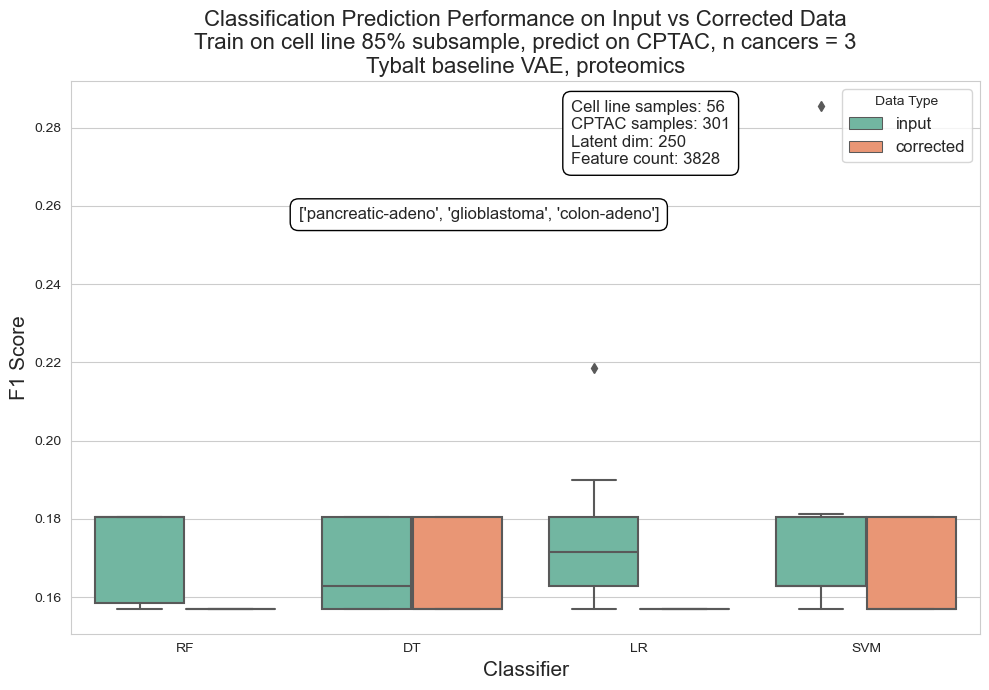

In [90]:
dta_mode = inp_pths[path_index_toggle].split(
    '/')[-1].split('.')[0].split('_')[1]

cancer_count = len(input_df.Cancer_type.unique())

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 7))

# Plot
sns.boxplot(data=results_df, x='classifier', y='score',
            hue='type', palette='Set2')

# cancer_count = 5
# cancer_count = 5

# Adding title and labels
plt.title('Classification Prediction Performance on Input'+
          ' vs Corrected Data\nTrain on '+mdl_sys_inline+' 85% subsample, '+
          'predict on CPTAC, n cancers = '+str(cancer_count)+
          '\n'+corr_mthd_title+', '+dta_mode, fontsize=16)
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('F1 Score', fontsize=15)
plt.legend(title='Data Type', fontsize=12)

plt.annotate(sample_count_lbl+' samples: {}'.format(len(inp_mdl_sys_train_df))+
             '\nCPTAC samples: {}'.format(len(CPTAC_input))+
             '\nLatent dim: '+str(latent_dim)+'\nFeature count: {}'.format(
                 len(X_input.columns)), 
                 # xy=(0.03, 0.85), # Tybalt
                 xy=(0.55, 0.85), # 
                 xycoords='axes fraction', 
                 bbox=dict(boxstyle='round, pad=0.5', fc='white', ec='black'),
                 fontsize=12)

plt.annotate([i for i in input_df.Cancer_type.unique()], 
                 # xy=(0.03, 0.85), # Tybalt
                 xy=(0.25, 0.75), # 
                 xycoords='axes fraction', 
                 bbox=dict(boxstyle='round, pad=0.5', fc='white', ec='black'),
                 fontsize=12)

# Display the plot
plt.tight_layout()
plt.savefig('../results/r8/'+
            production_date+'/input-'+mthd_file_disk_name+
            '_clf-eval-n4_x-val=30_'+
            inp_pths[path_index_toggle].split('/')[-1].split('.')[0]+
            '.png',
            dpi = 300)
# plt.show()

In [ ]:
X_input